# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(315, 315)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2021-03-31 19:48:11,liquid,bitbank,BTC/JPY,0.006,26
1,2021-03-31 19:49:06,bitbank,liquid,BTC/JPY,0.006,-15
2,2021-03-31 19:49:10,liquid,bitbank,BTC/JPY,0.006,15
3,2021-03-31 19:51:35,bitbank,liquid,BTC/JPY,0.006,-7
4,2021-03-31 19:51:57,liquid,bitbank,BTC/JPY,0.006,12
5,2021-03-31 19:52:13,bitbank,liquid,BTC/JPY,0.006,-6
6,2021-03-31 19:52:22,bitbank,liquid,BTC/JPY,0.006,13
7,2021-03-31 19:52:32,liquid,bitbank,BTC/JPY,0.006,-6
8,2021-03-31 19:53:15,liquid,bitbank,BTC/JPY,0.006,12
9,2021-03-31 19:53:25,bitbank,liquid,BTC/JPY,0.006,-4


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2021-03-31 19:48:11,liquid,買い,6388749.0
1,2021-03-31 19:48:11,bitbank,売り,6393103.0
2,2021-03-31 19:49:06,bitbank,買い,6385030.0
3,2021-03-31 19:49:06,liquid,売り,6382501.0
4,2021-03-31 19:49:10,liquid,買い,6382495.0
5,2021-03-31 19:49:10,bitbank,売り,6385004.0
6,2021-03-31 19:51:35,bitbank,買い,6380394.0
7,2021-03-31 19:51:35,liquid,売り,6379202.0
8,2021-03-31 19:51:57,liquid,買い,6381840.0
9,2021-03-31 19:51:57,bitbank,売り,6384000.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                  315
           取引回数                   19
           開始日時  2021-03-31 19:48:11
           終了日時  2021-03-31 20:04:27
        取引時間[H]      0 days 00:16:16
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 2602
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  ------
開始[JPY]     10000
終了[JPY]     10087
利益[JPY]        87
開始[BTC]     0.022
終了[BTC]     0.022
利益[BTC]         0
開始[TOTAL]  150633
終了[TOTAL]  150712
利益[TOTAL]  79.326
-----------  ------


## グラフ出力

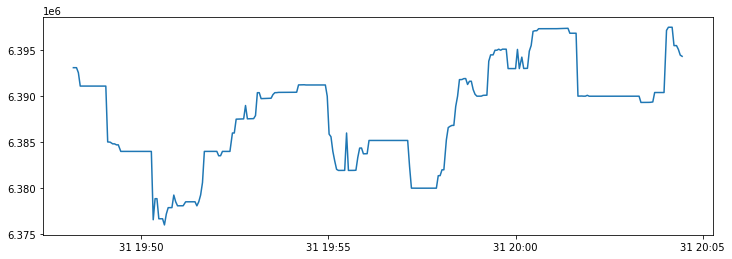

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

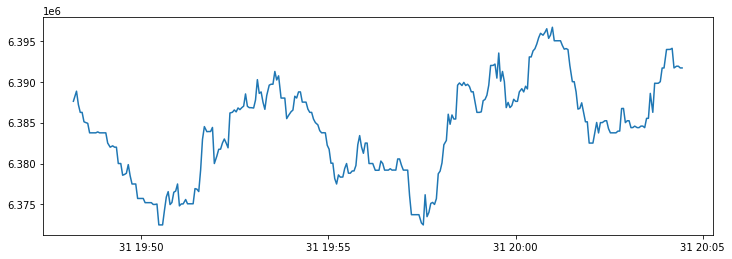

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_ex1_sell_ex2": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_ex2_sell_ex1": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'ex1_bid': df_ex1.reset_index().bid,
     'ex2_ask': df_ex2.reset_index().ask,
    'ex2_bid': df_ex2.reset_index().bid,
    'ex1_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_ex1_sell_ex2,buy_ex2_sell_ex1,ex1_bid,ex2_ask,ex2_bid,ex1_ask
timestamp,,,,,,
2021-03-31 19:40:00,-5912,4394,6387862,6383468,6382180,6388091
2021-03-31 19:50:00,-4376,1844,6385760,6383916,6382397,6386773
2021-03-31 20:00:00,-4983,2260,6392916,6390655,6389034,6394017
